## Datavis for sentiment change

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [5]:
data = pd.read_csv("digital_health_tweets_marked.csv",low_memory=False)
data.shape

(49272, 33)

In [13]:
pd.set_option('max_columns', None)
# pd.reset_option('max_columns')

In [17]:
data = data[['id','tweet','date','time','replies_count','likes_count','retweets_count','screen_name','name','hashtags','gender']]

### find sentiment using textblob

In [42]:
from textblob import TextBlob
# Function to get sentiment 
def get_polarity(sentence):
    return (TextBlob(sentence).sentiment[0])
def get_subjectivity(sentence):
    return (TextBlob(sentence).sentiment[1])

In [83]:
data['polarity'] = data['tweet'].apply(lambda x: get_polarity(x))
data['subjectivity'] = data['tweet'].apply(lambda x: get_subjectivity(x))


/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


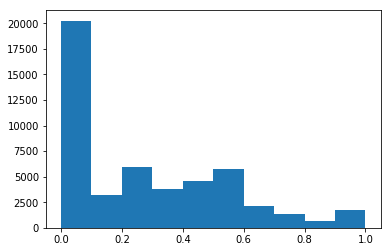

In [49]:
plt.hist(data['subjectivity'])
plt.show()

In [45]:
apply_polarity("This book is really inspiring, with thoughtful content and cute illustrations")

0.4666666666666666

In [82]:
data.fillna(value={'hashtags': ""}, inplace = True)
data.dropna(inplace=True)

/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
data["is_postitive"] = [1 if i == True else 0 for i in data["polarity"]>0]
data["is_negative"] = [1 if i == True else 0 for i in data["polarity"]<0]
data["is_neutral"] = [1 if i == True else 0 for i in data["polarity"]==0]
data["tweet_count"] = 1

In [106]:
date_counts = data.groupby(['date']).sum()[['replies_count', 'likes_count',
       'is_postitive', 'is_negative', 'is_neutral','tweet_count']]
date_counts

,replies_count,likes_count,is_postitive,is_negative,is_neutral,tweet_count
date,,,,,,
2018-01-01,24.0,686.0,155.0,28.0,163.0,346.0
2018-01-15,100.0,2027.0,383.0,85.0,499.0,967.0
2018-01-29,83.0,1899.0,448.0,80.0,449.0,977.0
2018-02-12,80.0,1964.0,447.0,67.0,427.0,941.0
2018-02-26,89.0,2369.0,459.0,64.0,480.0,1003.0
...,...,...,...,...,...,...
2020-04-06,91.0,1582.0,316.0,35.0,283.0,634.0
2020-04-20,57.0,1352.0,301.0,54.0,250.0,605.0
2020-05-04,122.0,2719.0,376.0,49.0,280.0,705.0


In [107]:
date_mean = data.groupby(['date']).mean()[['polarity', 'subjectivity']]
date_mean

,polarity,subjectivity
date,,
2018-01-01,0.108933,0.253051
2018-01-15,0.097512,0.221121
2018-01-29,0.121172,0.252355
2018-02-12,0.117654,0.257158
2018-02-26,0.115394,0.240891
...,...,...
2020-04-06,0.139498,0.254372
2020-04-20,0.126446,0.284156
2020-05-04,0.153331,0.286758


In [124]:
datavis = date_counts.join(date_mean, how='outer')
datavis = datavis.reset_index()
datavis['date'] = datavis['date'].apply(lambda i: datetime.datetime.strptime(i, '%Y-%m-%d'))
datavis

,date,replies_count,likes_count,is_postitive,is_negative,is_neutral,tweet_count,polarity,subjectivity
0,2018-01-01,24.0,686.0,155.0,28.0,163.0,346.0,0.108933,0.253051
1,2018-01-15,100.0,2027.0,383.0,85.0,499.0,967.0,0.097512,0.221121
2,2018-01-29,83.0,1899.0,448.0,80.0,449.0,977.0,0.121172,0.252355
3,2018-02-12,80.0,1964.0,447.0,67.0,427.0,941.0,0.117654,0.257158
4,2018-02-26,89.0,2369.0,459.0,64.0,480.0,1003.0,0.115394,0.240891
...,...,...,...,...,...,...,...,...,...
59,2020-04-06,91.0,1582.0,316.0,35.0,283.0,634.0,0.139498,0.254372
60,2020-04-20,57.0,1352.0,301.0,54.0,250.0,605.0,0.126446,0.284156
61,2020-05-04,122.0,2719.0,376.0,49.0,280.0,705.0,0.153331,0.286758
62,2020-05-18,99.0,1829.0,360.0,51.0,299.0,710.0,0.127182,0.252642


In [146]:
datavis["postitive_normalized"] = datavis["is_postitive"] / datavis["tweet_count"]
datavis["negative_normalized"] = datavis["is_negative"] / datavis["tweet_count"]
datavis["neutral_normalized"] = datavis["is_neutral"] / datavis["tweet_count"]

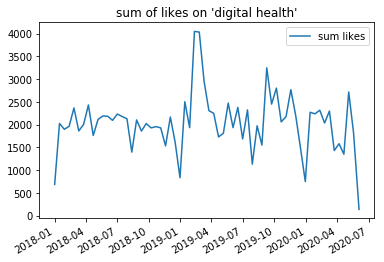

In [168]:
plt.plot(datavis.date,datavis.likes_count,label="sum likes")
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("sum of likes on \'digital health\'")
plt.show()

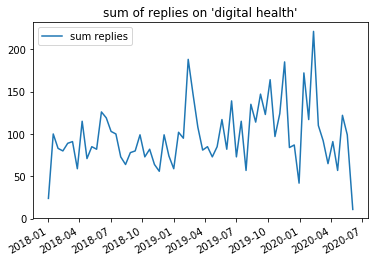

In [167]:
plt.plot(datavis.date,datavis.replies_count,label="sum replies")
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("sum of replies on \'digital health\'")
plt.show()

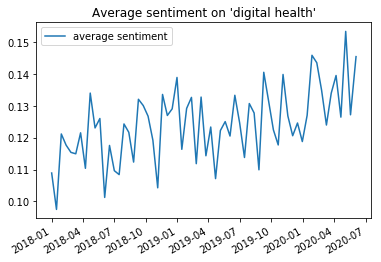

In [153]:
plt.plot(datavis.date,datavis.polarity,label="average sentiment")
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("Average sentiment on \'digital health\'")
plt.show()

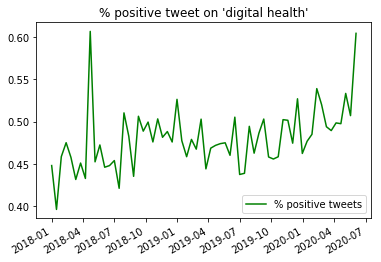

In [161]:
plt.plot(datavis.date,datavis.postitive_normalized,c="g",label="% positive tweets")

plt.legend()
plt.gcf().autofmt_xdate()
plt.title("% positive tweet on \'digital health\'")
plt.show()

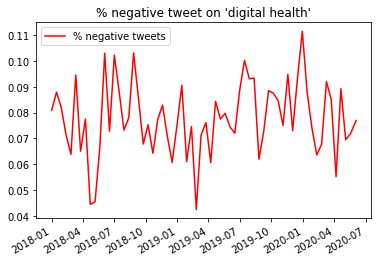

In [162]:
plt.plot(datavis.date,datavis.negative_normalized,c="r",label="% negative tweets")

plt.legend()
plt.gcf().autofmt_xdate()
plt.title("% negative tweet on \'digital health\'")
plt.show()

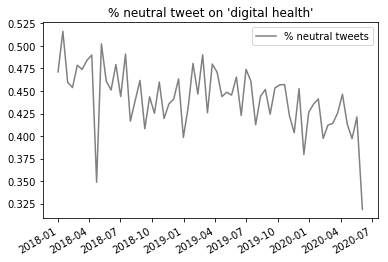

In [163]:
plt.plot(datavis.date,datavis.neutral_normalized,c="grey",label="% neutral tweets")
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("% neutral tweet on \'digital health\'")
plt.show()

In [175]:
gender_counts = data.groupby(['gender']).sum()[['replies_count', 'likes_count',
       'is_postitive', 'is_negative', 'is_neutral','tweet_count']]

In [176]:
gender_mean = data.groupby(['gender']).mean()[['polarity', 'subjectivity']]

In [179]:
gendervis = gender_counts.join(gender_mean, how='outer')
gendervis = gendervis.reset_index()


In [180]:
gendervis

,gender,replies_count,likes_count,is_postitive,is_negative,is_neutral,tweet_count,polarity,subjectivity
0,brand,5126.0,117845.0,21149.0,3294.0,20786.0,45229.0,0.121585,0.255434
1,female,65.0,428.0,135.0,20.0,133.0,288.0,0.156273,0.245061
2,male,1043.0,12454.0,2205.0,478.0,1070.0,3753.0,0.142239,0.349052


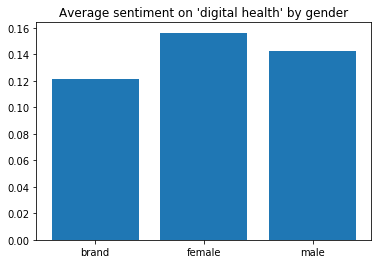

In [185]:
plt.bar(gendervis.gender, gendervis.polarity)
plt.title("Average sentiment on \'digital health\' by gender")
plt.show()

[21149.0, 135.0, 2205.0]

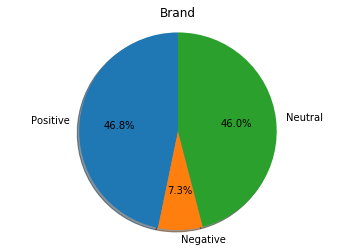

In [199]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [gendervis['is_postitive'][0],gendervis['is_negative'][0],gendervis['is_neutral'][0]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Brand")
plt.show()

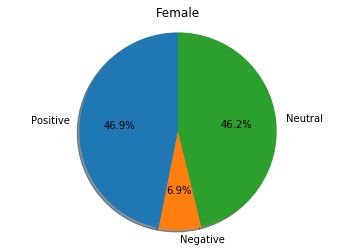

In [203]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [gendervis['is_postitive'][1],gendervis['is_negative'][1],gendervis['is_neutral'][1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Female")
plt.show()

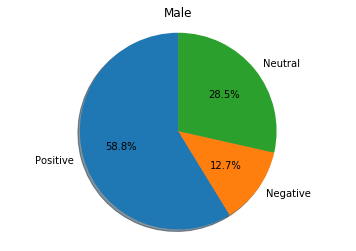

In [201]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [gendervis['is_postitive'][2],gendervis['is_negative'][2],gendervis['is_neutral'][2]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Male")
plt.show()